# ChatGPT Prompt Engineering for Developers
Course link: [link](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/1/introduction)

### What is LLM?
"LLM" in the context of "Large Language Model" refers to advanced artificial intelligence models, like GPT-3 (Generative Pre-trained Transformer 3), which is the technology behind my ChatGPT response. These large language models are trained on massive amounts of text data and are capable of understanding and generating human-like text. They have a wide range of applications in natural language processing, including text generation, language translation, question answering, and more.

### Types of LLM (Large Language Models)
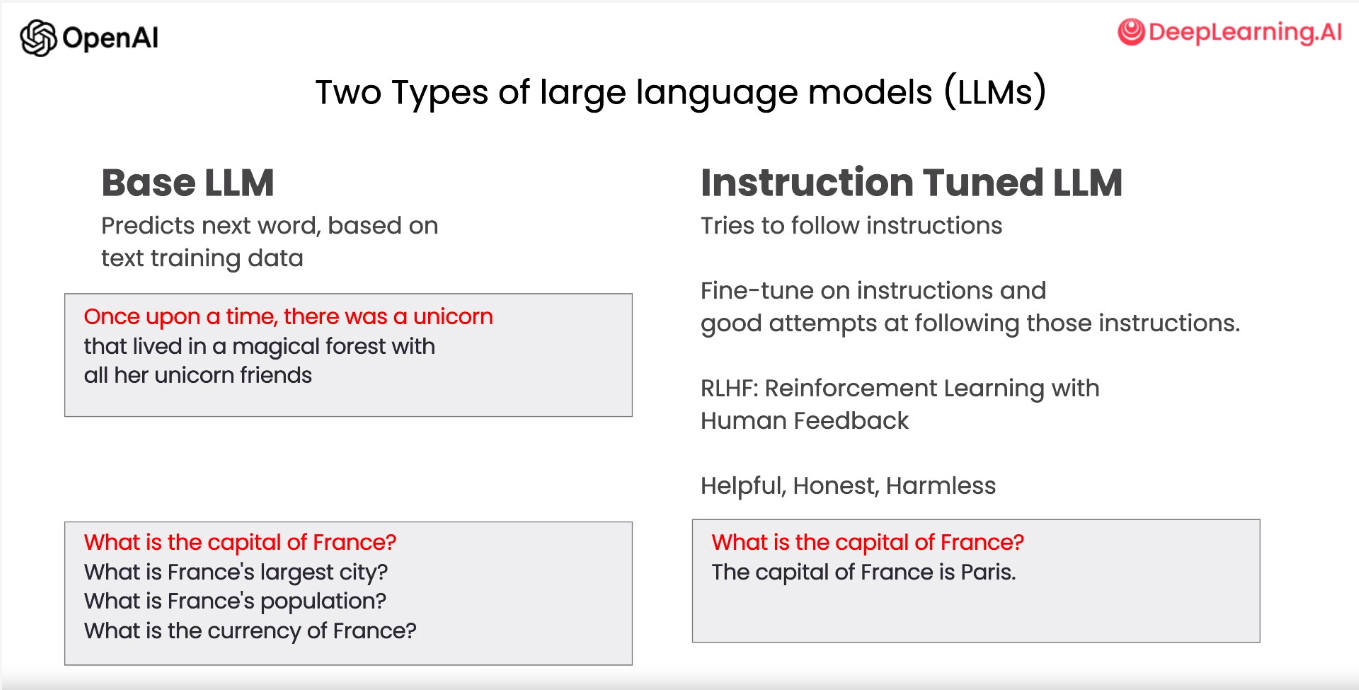

### Guidelines for Prompting

The first principle is to write clear and specific instructions and the second principle is to give the model time to think.

### Setup
#### Load the API Key and relevant Python Libraries

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key = os.getenv("OPENAI_KEY")

#### Helper function
We'll use "gpt-4" or "gpt-3.5-turbo" model for the chat completion. ([Ref.](https://platform.openai.com/docs/guides/gpt)) / [Chat completions API](https://platform.openai.com/docs/guides/gpt/chat-completions-api)

In [9]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model, 
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]

### Prompting Principles
- Principle 1: Write clear and specific instructions
- Principle 2: Give the model time to "think"

### Tactics

#### Tactics 1: Use delimiter to clearly indicate distinct parts of the input
- Delimiters can be anything like:
  - \```
  - """
  - <>
  - \<tag>\</tag>

In [10]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

To guide a model towards the desired output and reduce irrelevant or incorrect responses, it is important to provide clear and specific instructions, which can be achieved through longer prompts that offer more clarity and context.


#### Tactics 2: Ask for a structured output
- JSON, HTML, etc.

In [11]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

{
  "books": [
    {
      "book_id": 1,
      "title": "The Enigma of Elysium",
      "author": "Evelyn Sinclair",
      "genre": "Mystery"
    },
    {
      "book_id": 2,
      "title": "Whispers in the Wind",
      "author": "Nathaniel Blackwood",
      "genre": "Fantasy"
    },
    {
      "book_id": 3,
      "title": "Echoes of the Past",
      "author": "Amelia Hart",
      "genre": "Romance"
    }
  ]
}
